## 1. Simple linear regression

# Linear Regression

### Example: House price prediction

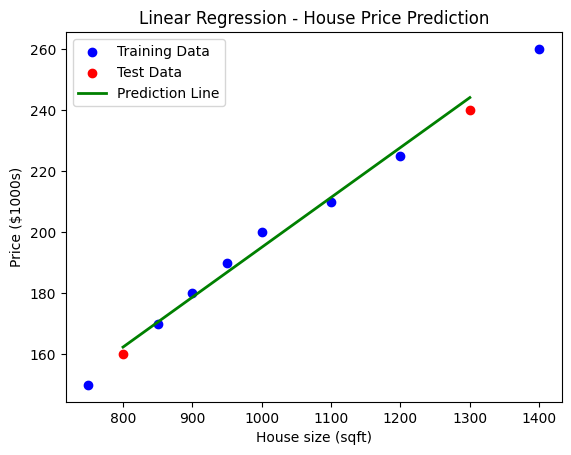

In [1]:
# import libraries
import numpy as np  # used for numerical operations and array manipulation
import pandas as pd   # helps in handling structured data
import matplotlib.pyplot as plt  # used for plotting graphs
from sklearn.linear_model import LinearRegression  # provides linear regression model
from sklearn.model_selection import train_test_split  # splits data into training and test sets

# sample data creation

# house size (in sqft)
# create numpy array and reshapes the array into column format as sklearn expects 2D input
X = np.array([750,800,850,900,950,1000,1100,1200,1300,1400]).reshape(-1,1)

# corresponding prices (in $1000s)
Y = np.array([150,160,170,180,190,200,210,225,240,260])

# train linear regression model

# split the dataset
# train_test_split() - splits the dataset into training and test sets
# test_size=0.2 - 20% of the data goes into the test set
# random_state=42 - Ensures reproducibility of results
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# create model and train it
# LinearRegression() - creates a linear regression model
# .fit(X_train, Y_train) - fits the model using the training data
model = LinearRegression()
model.fit(X_train, Y_train)

# predict prices
# .predict(X_test) - uses the trained model to predict house prices for unseen data
Y_pred = model.predict(X_test)

# visualize the results
# creates a scatter plot
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='red', label='Test Data')
# draws the best-fit line
plt.plot(X_test, Y_pred, color='green', linewidth=2, label='Prediction Line')
# adds labels and titles
plt.xlabel('House size (sqft)')
plt.ylabel('Price ($1000s)')
plt.title('Linear Regression - House Price Prediction')
# display legend for clarity
plt.legend()
# renders the plot
plt.show()

## 2. Multiple Linear Regression

### Example: Boston Housing

### **1. Data Exploration**

- Loaded the **Boston Housing dataset**, which contains housing-related factors like crime rate (`CRIM`), number of rooms (`RM`), student-teacher ratio (`PTRATIO`), and median home price (`MEDV`).
- Inspected the column names and checked for **correlations** between features and house prices to identify important predictors.

### **2. Feature Selection**

- Using **correlation analysis**, found:
  - `RM` (number of rooms) had a strong **positive** correlation with house prices.
  - `LSTAT` (lower-status population percentage) had a strong **negative** correlation.
  - `PTRATIO` (pupil-teacher ratio) negatively impacted prices.
- Based on this, selected **RM, LSTAT, and PTRATIO** as the best features for predicting `MEDV`.

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/WatchDog284/Data-Analytics/refs/heads/main/ds_bostonHousing_removingOutliers.csv"
data = pd.read_csv(url)

corr_matrix = data.corr()
print(corr_matrix["medv"].sort_values(ascending=False))

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


### **3. Building the Linear Regression Model**

- Performed **Multiple Linear Regression**, where house prices (`MEDV`) were predicted using multiple independent variables (`RM`, `LSTAT`, and `PTRATIO`).
- **Split the dataset** into **training** and **test sets** using `train_test_split`.
- Trained a **Linear Regression model** from `sklearn`, then predicted values for the test set.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X1 = data[["rm", "lstat", "ptratio"]]
Y1 = data["medv"]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

Y1_test = Y1_test.squeeze()

model = LinearRegression()
model.fit(X1_train, Y1_train)

Y1_pred = model.predict(X1_test)

#feature_importance = dict(zip(X.columns, model.coef_))
#print(feature_importance)

### **4. Model Evaluation**

- Calculated key metrics:
  - **Mean Absolute Error (MAE)**: Measures average prediction errors.
  - **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.
  - **R-squared (R²) score**: Measures how well the model explains price variance (~67.7% in our case).

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Y1_pred = model.predict(X1)
mae = mean_absolute_error(Y1, Y1_pred)
mse = mean_squared_error(Y1, Y1_pred)
r2 = r2_score(Y1, Y1_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R-Squared Score: ", r2)

Mean Absolute Error:  3.6121918105617645
Mean Squared Error:  27.213657965799495
R-Squared Score:  0.6776379881048219


### **5. Created Visual**

Visualized results using **scatter plots** and **residual distribution plots**.

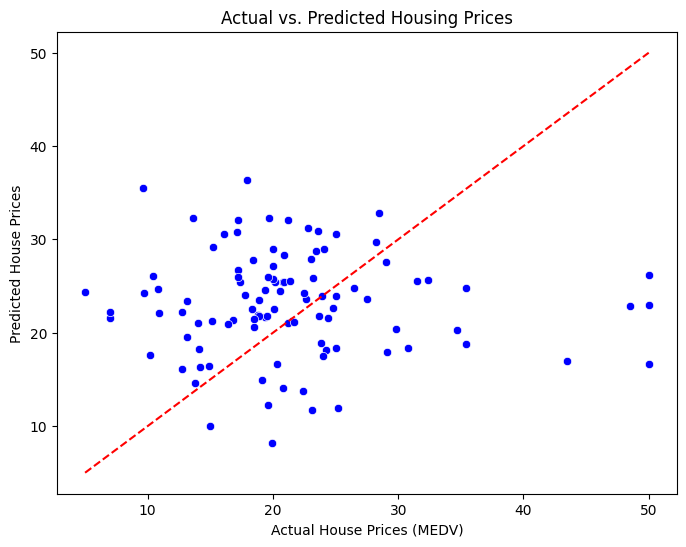

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

Y1_test = Y1_test
Y1_pred = Y1_pred[:len(Y1_test)] # Matching dimension based on Y1_test. Y1_test = 102 is shorter than Y1_pred = 506

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y1_test, y=Y1_pred, color="blue")  # Plot actual vs predicted
plt.plot([Y1_test.min(), Y1_test.max()], [Y1_test.min(), Y1_test.max()], '--', color="red")  # Ideal fit line
plt.xlabel("Actual House Prices (MEDV)")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted Housing Prices")
plt.show()


In [31]:
print("shape of Y1_test: ", Y1_test.shape)
print("shape of Y_pred: ", Y1_pred.shape)


# print("\n")

# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

# print("\n")

# print(X_train.iloc[:,0].shape)
# print(Y_train.shape)
# print(X_test.iloc[:,0].shape)
# print(Y_test.shape)

shape of Y1_test:  (102,)
shape of Y_pred:  (102,)
